In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data2_0.5_4.csv')

In [ ]:
df.head()

class_label  feature1  feature2
0            0  0.125074  0.006318
1            0  0.149702  0.015162
2            0  0.173691  0.026500
3            0  0.196854  0.040288
4            0  0.219006  0.056467

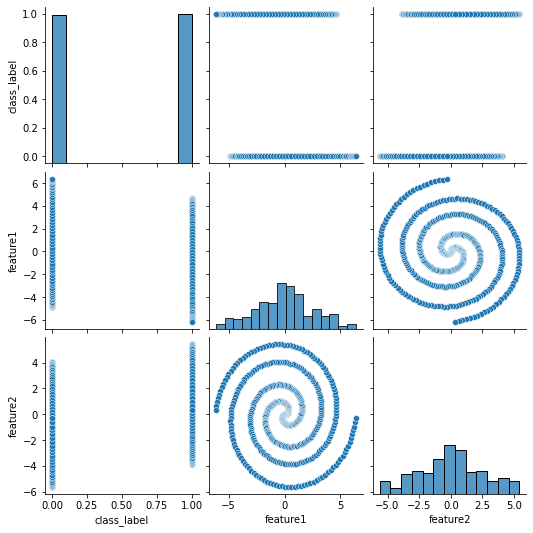

In [ ]:
sns.pairplot(df)

In [ ]:
from  sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1', 'feature2']].values

In [ ]:
y = df['class_label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(347, 2)

In [ ]:
X_test.shape

(150, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test =scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(4,activation ='relu'))
model.add(Dense(8,activation ='relu'))
model.add(Dense(12,activation ='relu'))
model.add(Dense(16,activation ='relu'))


model.add(Dense(1))

model.compile(optimizer ='rmsprop',loss ='mse')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
11/11 [==============================] - 1s 2ms/step - loss: 0.4703
Epoch 2/250
11/11 [==============================] - 0s 2ms/step - loss: 0.4148
Epoch 3/250
11/11 [==============================] - 0s 2ms/step - loss: 0.3575
Epoch 4/250
11/11 [==============================] - 0s 3ms/step - loss: 0.3057
Epoch 5/250
11/11 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 6/250
11/11 [==============================] - 0s 2ms/step - loss: 0.2544
Epoch 7/250
11/11 [==============================] - 0s 2ms/step - loss: 0.2515
Epoch 8/250
11/11 [==============================] - 0s 2ms/step - loss: 0.2496
Epoch 9/250
11/11 [==============================] - 0s 3ms/step - loss: 0.2498
Epoch 10/250
11/11 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 11/250
11/11 [==============================] - 0s 2ms/step - loss: 0.2480
Epoch 12/250
11/11 [==============================] - 0s 2ms/step - loss: 0.2470
Epoch 13/250
11/11 [=================

In [ ]:
loss_df = pd.DataFrame(model.history.history)

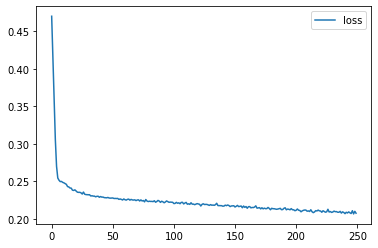

In [ ]:
loss_df.plot()

In [ ]:
model.evaluate(X_test,y_test,verbose =0)

0.2269384264945984

In [ ]:
model.evaluate(X_train,y_train,verbose =0)

0.204941064119339

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_predictions = pd.Series(test_predictions.reshape(150,))

In [ ]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [ ]:
pred_df.columns = ['Test True Y','Model Predictions']

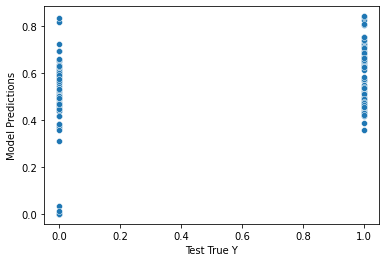

In [ ]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [ ]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.44736260602871575

In [ ]:
df.describe()

class_label    feature1      feature2
count   497.000000  497.000000  4.970000e+02
mean      0.501006   -0.000201 -1.006026e-11
std       0.500503    2.567982  2.559011e+00
min       0.000000   -6.150111 -5.618941e+00
25%       0.000000   -1.650217 -1.725929e+00
50%       1.000000    0.035333  4.991078e-03
75%       1.000000    1.513146  1.653504e+00
max       1.000000    6.349857  5.420090e+00

In [ ]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.22693842893655258